This problem statement is to predict a load approval when somebody applies for a loan to a his insurance company. The loan is called policy loan. The company needs to identify potential customers who are eligible for taking a policy loan.

1) Loan -	A unique id | 

2	Gender -	Gender of the applicant Male/female|

3	Married-	Marital Status of the applicant, values will be Yes/ No|

4	Dependents	It tells whether the applicant has any dependents or not.|

5	Education -	It will tell us whether the applicant is Graduated or not.|

6	Self_Employed-	This defines that the applicant is self-employed i.e. Yes/ No|

7	ApplicantIncome	- Applicant income
8	CoapplicantIncome	Co-applicant income|

9	LoanAmount-	Loan amount (in thousands)|

10	Loan_Amount_Term-	Terms of loan (in months)|

11	Credit_History-	Credit history of individual’s repayment of their debts|

12	Property_Area-	Area of property i.e. Rural/Urban/Semi-urban |

13	Loan_Status-	Status of Loan Approved or not i.e. Y- Yes, N-No |

In [86]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.preprocessing import OneHotEncoder


In [87]:
loan_df=pd.read_csv("/content/loan_insurance.csv")
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Data Preprocessing and Visualization**

In [88]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [89]:
loan_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [90]:
loan_df.shape

(614, 13)

In [91]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [92]:
loan_df=loan_df.dropna()

In [93]:
loan_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [94]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [95]:
loan_df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [96]:
loan_df.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)

<ipython-input-96-204e0cd16dad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)


In [97]:
loan_df = loan_df.replace(to_replace='3+',value=4)

<Axes: xlabel='Gender', ylabel='count'>

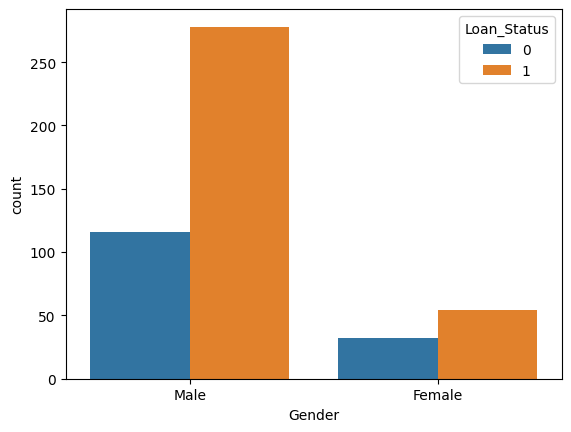

In [98]:
sns.countplot(x='Gender', hue='Loan_Status',data=loan_df)

<Axes: xlabel='Married', ylabel='count'>

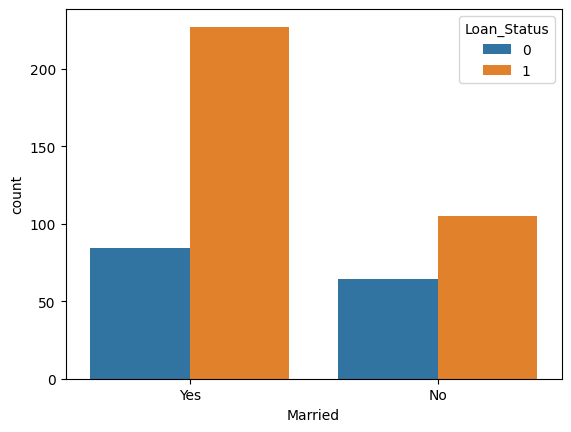

In [99]:
sns.countplot(x='Married', hue='Loan_Status',data=loan_df)

<Axes: xlabel='Dependents', ylabel='count'>

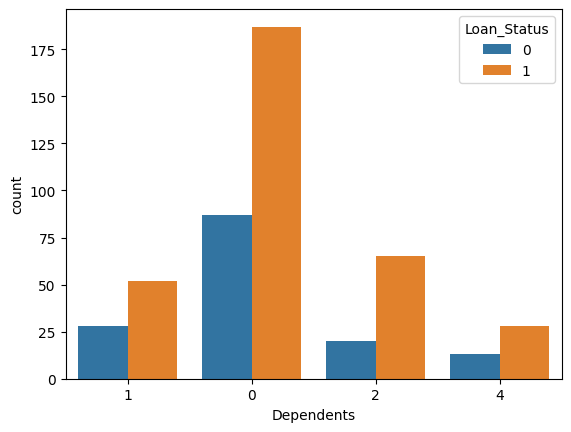

In [100]:
sns.countplot(x='Dependents', hue='Loan_Status',data=loan_df)

<Axes: xlabel='Education', ylabel='count'>

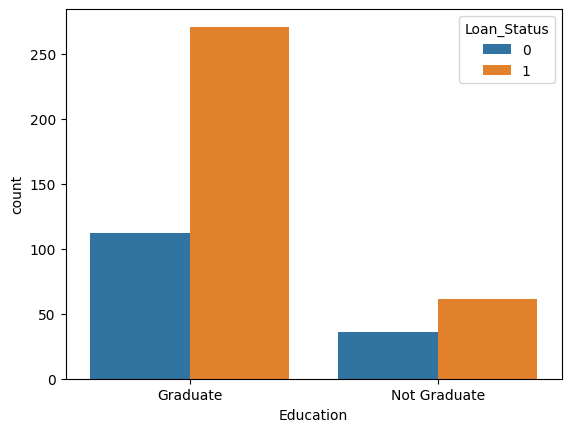

In [101]:
sns.countplot(x='Education', hue='Loan_Status',data=loan_df)

<Axes: xlabel='Self_Employed', ylabel='count'>

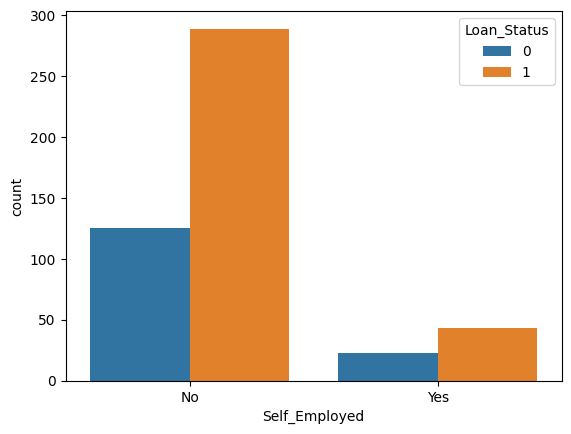

In [102]:
sns.countplot(x='Self_Employed', hue='Loan_Status',data=loan_df)

<Axes: xlabel='Property_Area', ylabel='count'>

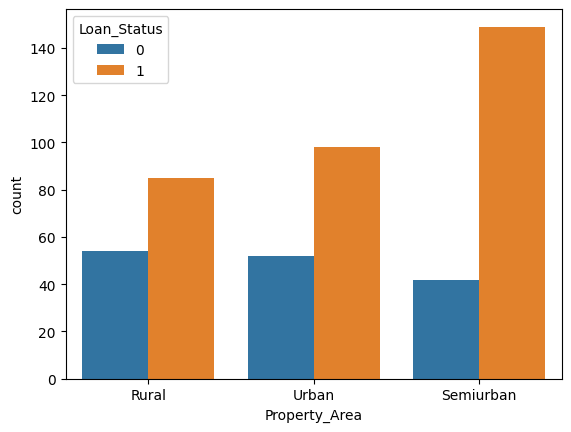

In [103]:
sns.countplot(x='Property_Area', hue='Loan_Status',data=loan_df)

In [104]:
loan_df.replace({"Married":{'No':0,'Yes':1},
            "Gender":{'Male':1,'Female':0},
            "Self_Employed":{'No':0,'Yes':1},
            "Property_Area":{'Rural':0,'Semiurban':1,'Urban':2},
            "Education":{'Not Graduate':0,'Graduate':1}
           },inplace=True)

In [105]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


Data Splitting

In [106]:
X = loan_df.iloc[:,1:-1]
y = loan_df.iloc[:,-1]

In [107]:
from sklearn.model_selection import train_test_split

In [113]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [114]:
from sklearn import svm
from sklearn.metrics import accuracy_score

Training and Testing Model

In [115]:
loan_model=svm.SVC(kernel="linear")

In [116]:
loan_model.fit(X_train,y_train)

SVC(kernel='linear')

In [118]:
train_prediction = loan_model.predict(X_train)
train_accuracy = accuracy_score(train_prediction,y_train)
train_accuracy

0.7916666666666666

In [119]:
test_prediction = loan_model.predict(X_test)
test_accuracy = accuracy_score(test_prediction,y_test)
test_accuracy

0.8125

In [121]:
input_data = (1,0,0,0,0,3200,2254.0,126.0,180.0,0.0,2)
input_data = np.asarray(input_data)
input_data = input_data.reshape(1,-1)
predict = loan_model.predict(input_data)
predict[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


1

In [122]:
if (predict[0] == 1):
    print("Loan is Approved")
else:
    print("Loan is Rejected")

Loan is Approved


Confusion Matrix

In [124]:
from sklearn.metrics import confusion_matrix

In [126]:
y_pred = loan_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[10 18]
 [ 0 68]]


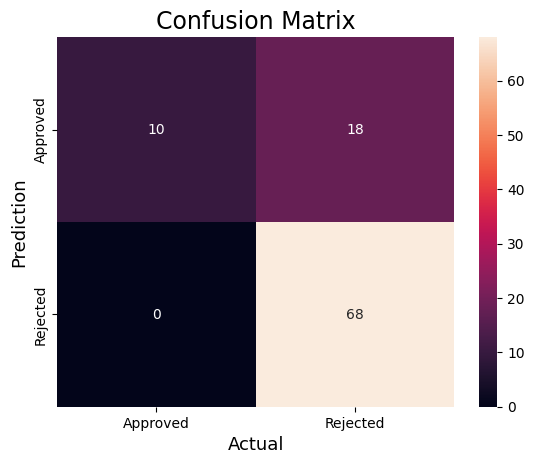

In [127]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Approved', 'Rejected'],
            yticklabels=['Approved', 'Rejected'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()